### Методы метрической классификации

#### Цель работы

Познакомиться с основными методами метрической классификации, их реализацией и приемами работы в scikit-learn.

#### Задания для выполнения

1. Загрузите [данные](https://www.kaggle.com/uciml/pima-indians-diabetes-database) о диагностике сахарного диабета;
2. Разделите эти данные на тестовую и обучающую выборки;
3. Постройте модель классификации для определения заболевания;
4. Оцените качество модели на тестовой выборке с помощью следующих метрик:
    1. достоверность предсказания (accuracy);
    2. точность (precision);
    3. полнота (recall);
5. Сделайте вывод о применимости модели.

#### Методические указания

Для начала работы обратимся к набору данных pima-indian-diabetes. Это довольно известный датасет, собравший информацию о медицинских показателях порядка 700 пациентов, обследованных на предмет наличия сахарного диабета. На нем мы потренируемся строить классификационные модели. 

Сперва загрузим исходный набор данных. Это можно сделать, как из файла csv (который можно легко найти в публичном доступе), либо используя встроенные функции библиотеки sklearn:

```py
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 
             'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('diabetes.csv', header=None, names=col_names)
pima = pima[1:]
```

Как и ранее, хорошей идеей перед началом анализа будет познакомиться с составом набора данных визуально. Выведем датасет на экран:

```py
pima.head()
```

При проведении серьезного анализа перед построением модели машинного обучения нужно провести тщательную обработку и очистку набора данных - удаление пропущенных значений, анализ шкал, нормализация, удаление выбросов и аномалий. Используемый нами набор - сам по себе довольно чистый, потому в учебных целях пропустим этот шаг.

Выделим целевую переменную и факторы:

```py
Y = pima.label
X = pima.drop(['label'], axis=1)
```

Разделим набор данных на обучающую и тестовую выборки:

```py
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                    random_state=True)
```

В данном случае мы используем удобную встроенную функцию sklearn для разбиения выборки. Мы используем соотношение 80/20 для обучающей и тестовой выборки. Соотношение может колебаться и зависит от множества факторов, но 80/20 - хорошее значение по умолчанию.

Построим модель логистической регрессии:

```py
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()
```

Здесь мы создаем объект классификатора, используя конструктор по умолчанию. Если нам нужно изменить стандартные параметры логистической регрессии (например, задать значение параметра регуляризации), то это можно сделать именно на этом этапе.

Обучим наш классификатор на обучающей выборке:

```py
cls.fit(x_train, y_train)
```

Для оценки эффективности полученной модели сделаем предсказания по нашему классификатору на тестовой выборке (там, где мы уже знаем правильные ответы, чтобы сравнить, насколько предсказания расходятся с действительностью):

```py
y_pred = cls.predict(x_test)
```

Оценим эффективность предсказания тестовой выборки при помощи матрицы классификации:

```py
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)
```

Матрица классификации показывает нам очень полезную информацию: совместное распределение числа объектов предсказанных и реальных классов. Рассматривая эту матрицу мы можем получить важную информацию: сколько объектов мы классифицировали правильно, сколько неверно, к каким классам наша модель тяготеет, какие классы распознаются хорошо, какие - плохо

То же самое в графической форме:

```py
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
```

Кроме матрицы классификации весьма полезно использовать численные метрики эффективности классификации. Существует большое количество таких метрик, в данной работе мы сосредоточимся на трех основных.

Метрика достоверности предсказания:

```py
metrics.accuracy_score(y_test, y_pred)
```

Метрика точности

```py
metrics.precision_score(y_test, y_pred)
```

Метрика полноты

```py
metrics.recall_score(y_test, y_pred)
```

#### Контрольные вопросы

1. Какие выводы мы можем сделать на основании метрик модели, построенной в данной лабораторной работе?
2. Чем логистическая регрессия отличается от линейной?
3. С помощью каких методов происходит оптимизация параметров логистической регрессии?
4. Почему метрики достоверности предсказания недостаточно для оценки эффективности модели?
5. Что такое метрика F1? Какие еще метрики из этого семейства существуют и для чего они служат?
6. Чем метод опорных векторов отличается от логистической регрессии? В чем его достоинства и недостатки?
7. В чем особенности метода ближайших соседей?

#### Дополнительные задания

1. Используйте метод опорных векторов для построения альтернативной модели предсказания диабета.
2. Сравните метрики эффективности и сделайте вывод о том, какая модель лучше предсказывает заболевание.
3. Постройте модели классификации на основе следующих методов:
    1. логистическая регрессия (LogisticRegression);
    2. метод опорных векторов с линейным ядром (SVC);
    3. метод опорных векторов с гауссовым ядром (SVC);
    4. метод k ближайших соседей (KNeighborsClassifier);
    5. многослойный перцептрон (MLP);
    6. другие методы по желанию;
4. Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;
5. Для каждой модели из п.3 постройте кривые обучения и диагностируйте недо-/переобучение модели. Попробуйте изменить параметр регуляризации для улучшения результатов модели.
6. Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).


### Задания для выполнения

1. Загрузите [данные](https://www.kaggle.com/uciml/pima-indians-diabetes-database) о диагностике сахарного диабета;


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
scores = pd.DataFrame(
    columns=['confusion matrix', 'accuracy', 'precision', 'recall'],
    index=[
        'LogisticRegression',
        'SVC linear',
        'SVC gauss',
        'KNeighborsClassifier',
        'MLP'
    ]
)
scores

,confusion matrix,accuracy,precision,recall
LogisticRegression,NaN,NaN,NaN,NaN
SVC linear,NaN,NaN,NaN,NaN
SVC gauss,NaN,NaN,NaN,NaN
KNeighborsClassifier,NaN,NaN,NaN,NaN
MLP,NaN,NaN,NaN,NaN


In [4]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
Y = diabetes.Outcome
X = diabetes.drop(['Outcome'], axis=1)

2. Разделите эти данные на тестовую и обучающую выборки;


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

3. Постройте модель классификации для определения заболевания;


In [7]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(max_iter=3000)
cls.fit(x_train, y_train)

LogisticRegression(max_iter=3000)

In [8]:
y_pred = cls.predict(x_test)

In [9]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[78, 21],
       [18, 37]], dtype=int64)

[TP, FP, \
FN, TN]

- TP — true positive: классификатор верно отнёс объект к рассматриваемому классу.
- TN — true negative: классификатор верно утверждает, что объект не принадлежит к рассматриваемому классу.
- FP — false positive: классификатор неверно отнёс объект к рассматриваемому классу.
- FN — false negative: классификатор неверно утверждает, что объект не принадлежит к рассматриваемому классу.

Text(0.5, 15.0, 'Предсказанные значения')

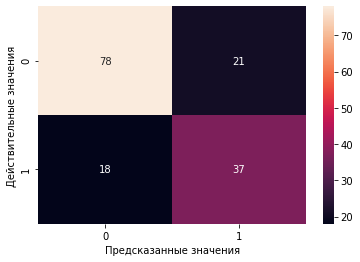

In [10]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [15]:
scores.iloc[0,0] = metrics.confusion_matrix(y_test, y_pred)
scores.iloc[0,0]

array([[78, 21],
       [18, 37]], dtype=int64)

[TP, FP, \
FN, TN]

Оцените качество модели на тестовой выборке с помощью следующих метрик

достоверность предсказания (accuracy)

доля правильных ответов из выборки, по графику видно, что это (78+37)/(78+37+18+21)

4. Оцените качество модели на тестовой выборке с помощью следующих метрик:
    1. достоверность предсказания (accuracy);
    2. точность (precision);
    3. полнота (recall);

In [11]:
scores.iloc[0,1] = metrics.accuracy_score(y_test, y_pred)
scores.iloc[0,1]

0.7467532467532467

точность (precision)

доля объектов, названных классификатором положительными и при этом действительно являющимися положительными

На графике это 78/(78+21)

In [12]:
scores.iloc[0,2] = metrics.precision_score(y_test, y_pred)
scores.iloc[0,2]

0.6379310344827587

полнота (recall)

доля объектов положительного класса из всех объектов положительного класса

На графике это 78/(78+18)

In [13]:
scores.iloc[0,3] = metrics.recall_score(y_test, y_pred)
scores.iloc[0,3]

0.6727272727272727

5. Сделайте вывод о применимости модели.

In [17]:
scores

,confusion matrix,accuracy,precision,recall
LogisticRegression,"[[78, 21], [18, 37]]",0.746753,0.637931,0.672727
SVC linear,NaN,NaN,NaN,NaN
SVC gauss,NaN,NaN,NaN,NaN
KNeighborsClassifier,NaN,NaN,NaN,NaN
MLP,NaN,NaN,NaN,NaN


67% пациентов с раком будут отнесены к больным (recall) \
37% пациентов с раком будут отнесены к здоровым (1-precision)

### Дополнительные задания

1. Используйте метод опорных векторов для построения альтернативной модели предсказания диабета.


In [18]:
def get_metrics(y_test, y_pred, average):
    matrix = metrics.confusion_matrix(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average=average)
    recall = metrics.recall_score(y_test, y_pred, average=average)
    return pd.Series(
        (matrix, accuracy, precision, recall),
        index=['confusion matrix', 'accuracy', 'precision', 'recall']
    )

In [19]:
def model_and_metrics(model, average="binary"):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)  
    returned = get_metrics(y_test, y_pred, average=average)
    %matplotlib inline
    class_names = [0, 1]
    fig, ax = plt.subplots()
    ticks = np.arange(len(class_names))
    plt.xticks(ticks, class_names)
    plt.yticks(ticks, class_names)
    sns.heatmap(pd.DataFrame(
        returned['confusion matrix']),
        annot=True)
    plt.ylabel('Действительные значения')
    plt.xlabel('Предсказанные значения')
    plt.show()  
    return returned

#### метод опорных векторов с линейным ядром (SVC)

In [20]:
from sklearn import svm

In [21]:
clf = svm.SVC(kernel='linear')

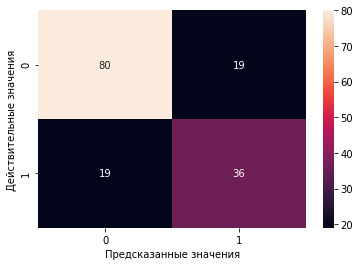

In [22]:
scores.iloc[1] = model_and_metrics(clf)

#### метод опорных векторов с гауссовым ядром (SVC)

In [24]:
clf_rbf = svm.SVC(kernel='rbf')

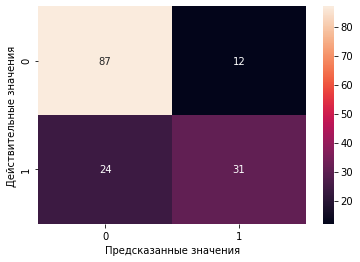

In [25]:
scores.iloc[2] = model_and_metrics(clf_rbf)

#### метод k ближайших соседей (KNeighborsClassifier);

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
neigh = KNeighborsClassifier(weights='distance')

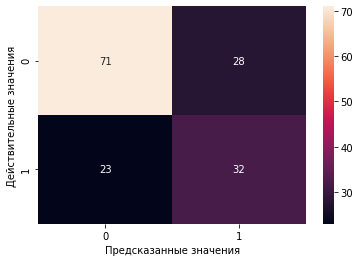

In [29]:
scores.iloc[3] = model_and_metrics(neigh)

#### многослойный перцептрон (MLP)

In [30]:
from sklearn.neural_network import MLPClassifier

In [31]:
mlp = MLPClassifier()

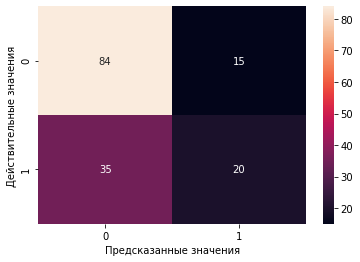

In [32]:
scores.iloc[4] = model_and_metrics(mlp)

# Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую

In [33]:
scores

,confusion matrix,accuracy,precision,recall
LogisticRegression,"[[78, 21], [18, 37]]",0.746753,0.637931,0.672727
SVC linear,"[[80, 19], [19, 36]]",0.753247,0.654545,0.654545
SVC gauss,"[[87, 12], [24, 31]]",0.766234,0.72093,0.563636
KNeighborsClassifier,"[[71, 28], [23, 32]]",0.668831,0.533333,0.581818
MLP,"[[84, 15], [35, 20]]",0.675325,0.571429,0.363636


чем выше recall и precision, тем больше модель подходит нам

# Для каждой модели из п.3 постройте кривые обучения и диагностируйте недо-/переобучение модели. Попробуйте изменить параметр регуляризации для улучшения результатов модели.

In [34]:
from sklearn.model_selection import learning_curve

In [75]:
def show_statisctic(reg, x=X, y=Y, train_sizes=np.linspace(0.1, 1, 10), cv=5, average='binary'):
    plt.figure()
    
    for scoring, color in zip(["accuracy", "precision", "recall"], ["r", "g", "b"]):
        train_sizes, _, test_scores = learning_curve( # _ параметр, который мы не хотим испольозовать
            reg,
            x,
            y,
            train_sizes=train_sizes,
            scoring=scoring,
            cv=cv,
        )
        plt.plot(train_sizes, test_scores.mean(1), "o--", color=color, label=scoring)
        
    plt.xlabel("Train size")
    plt.ylabel("score")
    plt.title("Learning curves")
    plt.legend(loc="best")
    plt.show()

#### Логистическая регрессия (LogisticRegression)

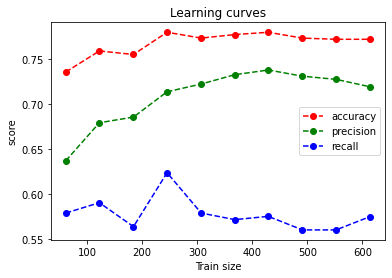

In [58]:
show_statisctic(LogisticRegression(max_iter=1000, C=20))

#### Метод опорных векторов с гауссовым ядром (SVC)


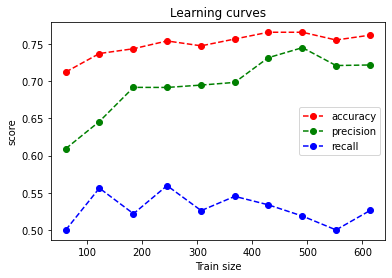

In [74]:
show_statisctic(svm.SVC(kernel='rbf', C=15))

#### Метод k ближайших соседей (KNeighborsClassifier)

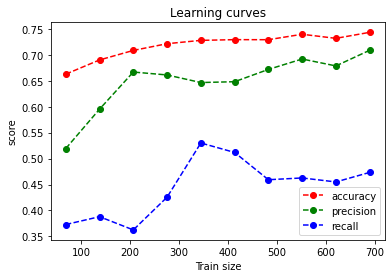

In [40]:
show_statisctic(KNeighborsClassifier(n_neighbors=10))

#### Многослойный перцептрон (MLP)

D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optim

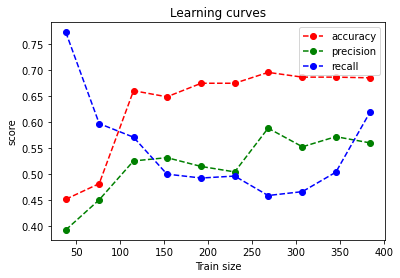

In [43]:
show_statisctic(MLPClassifier(max_iter=1000, hidden_layer_sizes=(300,20)))

# Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).

In [44]:
from sklearn.datasets import  load_iris
iris = load_iris()
X2 = iris.data
Y2 = iris.target

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, random_state=True)

In [46]:
def scorer_precision(estimator, x, y):
    y_pred = estimator.predict(x)
    return metrics.precision_score(y, y_pred, average='weighted', zero_division=0)
    
def scorer_recall(estimator, x, y):
    y_pred = estimator.predict(x)
    return metrics.recall_score(y, y_pred, average='weighted', zero_division=0)
    
def show_statisctic(reg, x=X, y=Y, train_sizes=np.linspace(0.1, 1, 10), cv=5):
    plt.figure()
    
    for name, scoring, color in zip(
        ["accuracy","precision", "recall"],
        ["accuracy", scorer_precision, scorer_recall],
        ["r", "g", "b"]
    ):
        
        train_sizes, _, test_scores = learning_curve(
            reg,
            x,
            y,
            train_sizes=train_sizes,
            scoring=scoring,
            cv=cv,
        )
        test_scores[np.isnan(test_scores)] = 0
        plt.plot(train_sizes, test_scores.mean(1), "o--", color=color, label=name)
        
    plt.xlabel("Train size")
    plt.ylabel("score")
    plt.title("Learning curves")
    plt.legend(loc="best")
    plt.show()

#### Логистическая регрессия (LogisticRegression)

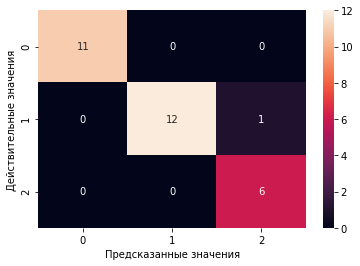

confusion matrix    [[11, 0, 0], [0, 12, 1], [0, 0, 6]]
accuracy                                       0.966667
precision                                      0.971429
recall                                         0.966667
dtype: object

In [47]:
cls = LogisticRegression(max_iter=1000)
model_and_metrics(cls, average='weighted')

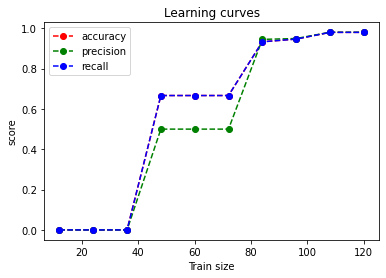

In [48]:
show_statisctic(LogisticRegression(max_iter=1000, C=20), X2, Y2)

#### Метод опорных векторов с линейным ядром (SVC)

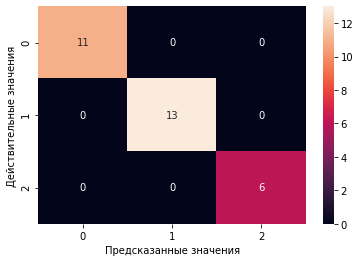

confusion matrix    [[11, 0, 0], [0, 13, 0], [0, 0, 6]]
accuracy                                            1.0
precision                                           1.0
recall                                              1.0
dtype: object

In [49]:
clf_linear = svm.SVC(kernel='linear')
model_and_metrics(clf_linear, average='weighted')

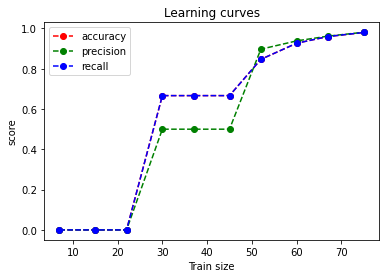

In [50]:
show_statisctic(svm.SVC(kernel='linear', C=10), X2, Y2, cv=2)

#### Метод опорных векторов с гауссовым ядром (SVC)

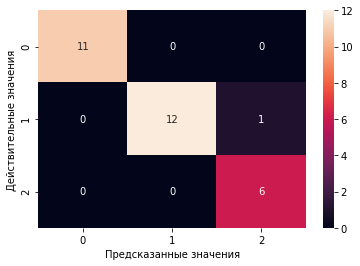

confusion matrix    [[11, 0, 0], [0, 12, 1], [0, 0, 6]]
accuracy                                       0.966667
precision                                      0.971429
recall                                         0.966667
dtype: object

In [51]:
clf_rbf = svm.SVC(kernel='rbf')
model_and_metrics(clf_rbf, average='weighted')

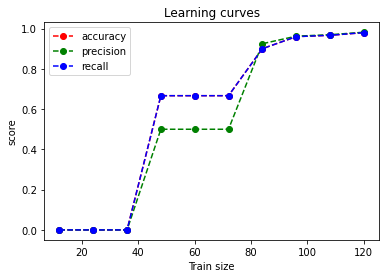

In [52]:
show_statisctic(svm.SVC(kernel='rbf', C=15), X2, Y2, cv=5)

#### Метод k ближайших соседей (KNeighborsClassifier)

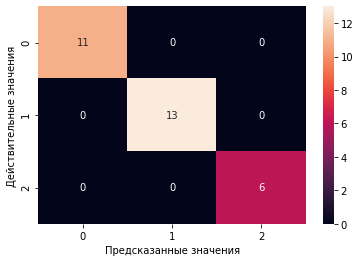

confusion matrix    [[11, 0, 0], [0, 13, 0], [0, 0, 6]]
accuracy                                            1.0
precision                                           1.0
recall                                              1.0
dtype: object

In [53]:
neigh = KNeighborsClassifier(weights='distance')
model_and_metrics(neigh, average='weighted')

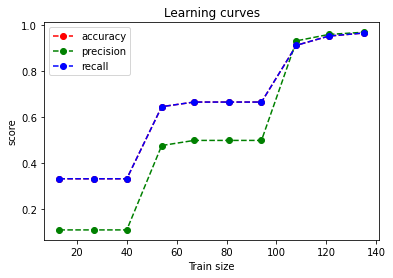

In [54]:
show_statisctic(KNeighborsClassifier(n_neighbors=10), X2, Y2, cv=10)

#### Многослойный перцептрон (MLP)

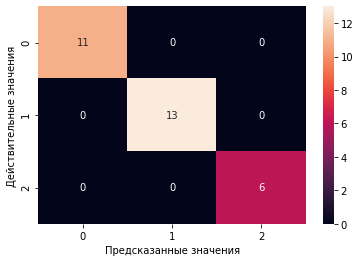

confusion matrix    [[11, 0, 0], [0, 13, 0], [0, 0, 6]]
accuracy                                            1.0
precision                                           1.0
recall                                              1.0
dtype: object

In [55]:
mlp = MLPClassifier(max_iter=1000)
model_and_metrics(mlp, average='weighted')

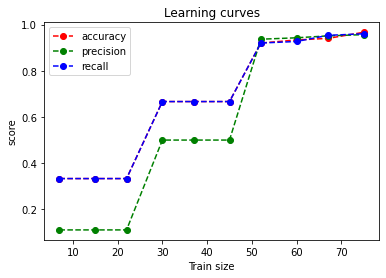

In [56]:
show_statisctic(MLPClassifier(max_iter=1000, hidden_layer_sizes=(300,20)), X2, Y2, cv=2)

# END END END END END END END END END END END END END END END

In [51]:
# https://habr.com/ru/company/ods/blog/484148/

from sklearn import svm

C = 1.0  # = self._alpha in our algorithm
model1 = svm.SVC(kernel='linear', C=C)
#model1 = svm.LinearSVC(C=C, max_iter=10000)
#model1 = svm.SVC(kernel='rbf', gamma=0.7, C=C)
#model1 = svm.SVC(kernel='poly', degree=3, gamma='auto', C=C)

model1.fit(x_train, y_train)
y_predict = model1.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))

0.7467532467532467
0.6727272727272727
0.6379310344827587


In [52]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

In [72]:
# plt.rcParams['figure.figsize'] = (10,8)
# plt.scatter(x_train[:, 2], x_train[:, 1], c=y_train, s=100, cmap='autumn', edgecolors='black');
# plt.plot(range(-2,5), range(4,-3,-1));

# # d = {-1:'green', 1:'red'}
# # plt.scatter(x_train[:,0], x_train[:,1], y_train)
# # newline([0,-svm._w[2]/svm._w[1]],[-svm._w[2]/svm._w[0],0], 'blue') # в w0*x_i[0]+w1*x_i[1]+w2*1=0 поочередно
# #                                                         # подставляем x_i[0]=0, x_i[1]=0
# # newline([0,1/svm._w[1]-svm._w[2]/svm._w[1]],[1/svm._w[0]-svm._w[2]/svm._w[0],0]) #w0*x_i[0]+w1*x_i[1]+w2*1=1
# # newline([0,-1/svm._w[1]-svm._w[2]/svm._w[1]],[-1/svm._w[0]-svm._w[2]/svm._w[0],0]) #w0*x_i[0]+w1*x_i[1]+w2*1=-1
# # plt.show()

2. Сравните метрики эффективности и сделайте вывод о том, какая модель лучше предсказывает заболевание.


3. Постройте модели классификации на основе следующих методов:
    1. логистическая регрессия (LogisticRegression);
    2. метод опорных векторов с линейным ядром (SVC);
    3. метод опорных векторов с гауссовым ядром (SVC);
    4. метод k ближайших соседей (KNeighborsClassifier);
    5. многослойный перцептрон (MLP);
    6. другие методы по желанию;


0.7467532467532467
0.6727272727272727
0.6379310344827587


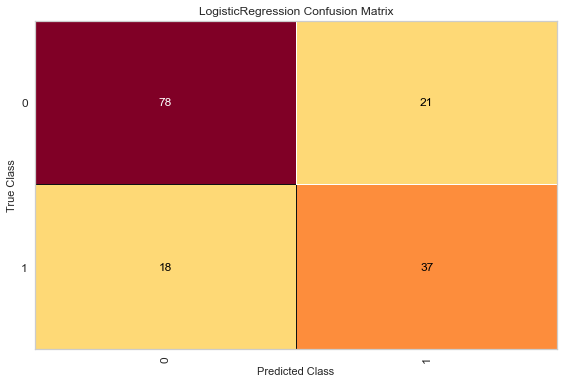

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [71]:
from yellowbrick.classifier import ConfusionMatrix
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))

cm = ConfusionMatrix(model1, classes = [0,1])
cm.fit(x_train,y_train)
cm.score( x_test, y_test)
cm.show()

0.7467532467532467
0.6727272727272727
0.6379310344827587


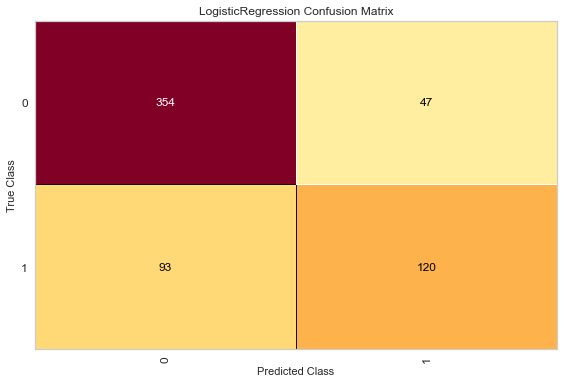

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [73]:
from yellowbrick.classifier import ConfusionMatrix
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))

cm = ConfusionMatrix(model1, classes = [0,1])
cm.fit(x_train,y_train)
cm.score( x_train, y_train)
cm.show()

In [75]:
print(round(78/154,2), round(21/154,2),'\n',round(18/154,2), round(37/154,2))

0.51 0.14 
 0.12 0.24


In [74]:
print(round(354/614,2), round(47/614,2),'\n',round(93/614,2), round(120/614,2))

0.58 0.08 
 0.15 0.2


0.6623376623376623
0.5818181818181818
0.5245901639344263


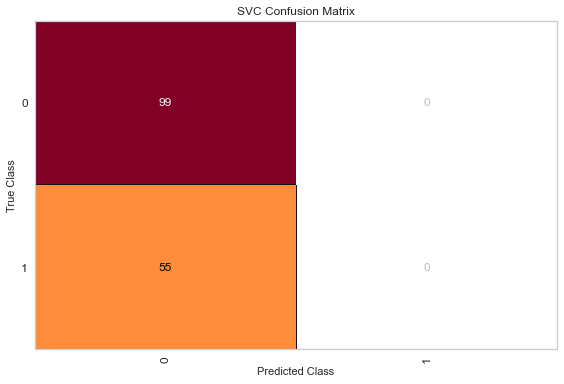

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [70]:
from yellowbrick.classifier import ConfusionMatrix
C = 1.0  # = self._alpha in our algorithm
model1 = svm.SVC(kernel='rbf', gamma=0.7, C=C)

model1.fit(x_train, y_train)
y_predict = model1.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))

cm = ConfusionMatrix(model1, classes = [0,1])
cm.fit(x_train,y_train)
cm.score( x_test, y_test)
cm.show()

0.6623376623376623
0.5818181818181818
0.5245901639344263


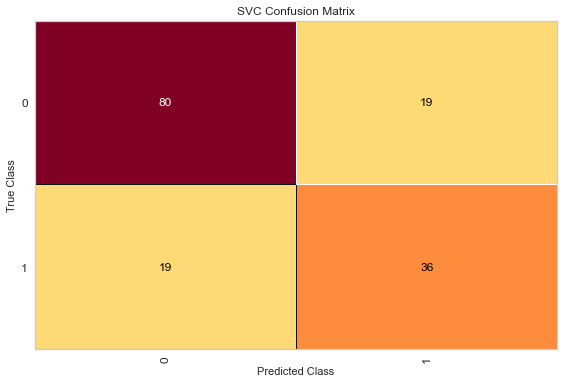

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [69]:
from yellowbrick.classifier import ConfusionMatrix
C = 1.0  # = self._alpha in our algorithm
model1 = svm.SVC(kernel='linear', C=C)

model1.fit(x_train, y_train)
y_predict = model1.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))

cm = ConfusionMatrix(model1, classes = [0,1])
cm.fit(x_train,y_train)
cm.score( x_test, y_test)
cm.show()

0.6623376623376623
0.5818181818181818
0.5245901639344263


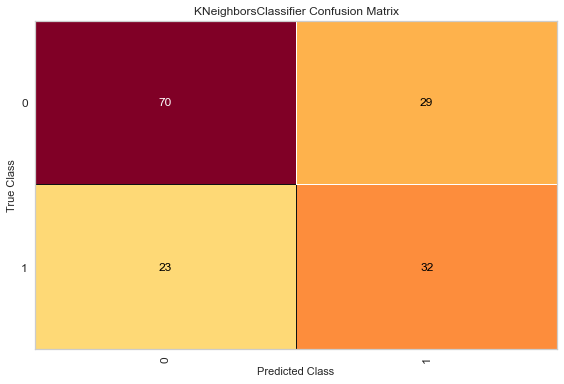

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [68]:
from yellowbrick.classifier import ConfusionMatrix
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()

model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))

cm = ConfusionMatrix(model1, classes = [0,1])
cm.fit(x_train,y_train)
cm.score( x_test, y_test)
cm.show()

0.7142857142857143
0.7090909090909091
0.582089552238806


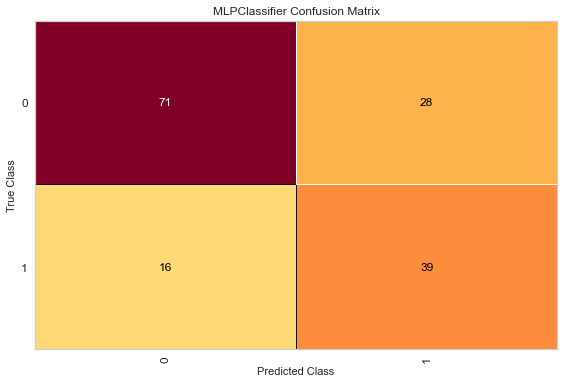

<AxesSubplot:title={'center':'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [64]:
from yellowbrick.classifier import ConfusionMatrix
from sklearn.neural_network import MLPClassifier
model1 = MLPClassifier()

model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))

cm = ConfusionMatrix(model1, classes = [0,1])
cm.fit(x_train,y_train)
cm.score( x_test, y_test)
cm.show()

4. Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;


5. Для каждой модели из п.3 постройте кривые обучения и диагностируйте недо-/переобучение модели. Попробуйте изменить параметр регуляризации для улучшения результатов модели.


6. Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).


### Подрубаем библиотеки

In [17]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
plt.rcParams['figure.figsize'] = (8,6)
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


def newline(p1, p2, color=None): # функция отрисовки линии
    #function kredits to: https://fooobar.com/questions/626491/how-to-draw-a-line-with-matplotlib
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax], color=color)
    ax.add_line(l)
    return l

### Алгоритм

Здесь и далее wx = w1 x1 + w2 x2 + ... + wn 1

- margin = y(w*x) --> max
- уравнение полосы разделения: -1<w*x<1
- Hinge_loss = 0.5ww+max(1-y(wx),0) --> min

hard-margin:

- никакие объекты из трейновой выборки не должны попадать на полосу разделения. Покажем работу алгоритма на датасете Ирис, для классов 0 и 1+2

soft-margin:

- позволим алгоритму допускать ошибки на обучающих объектах, но при этом постараемся, чтобы ошибок было поменьше. Покажем работу алгоритма на датасете Ирис, для классов 0+1 и 2

Правила изменения весов вытекают из минимизации функционала Q=max(1-margin,0)+alpha*w^2:

- w = w - C * w (правильная классификация, ywx > 1)
- w = w - step(y x - C * w) (неправильная классификация, ywx < 0 << 1 или объект попал на полосу, 0<ywx<1)

In [18]:
def add_bias_feature(a):
    a_extended = np.zeros((a.shape[0],a.shape[1]+1))
    a_extended[:,:-1] = a
    a_extended[:,-1] = int(1)  
    return a_extended


class CustomSVM(object):
    
    __class__ = "CustomSVM"
    __doc__ = """
    This is an implementation of the SVM classification algorithm
    Note that it works only for binary classification
    
    #############################################################
    ######################   PARAMETERS    ######################
    #############################################################
    
    etha: float(default - 0.01)
        Learning rate, gradient step
        
    alpha: float, (default - 1.0)
        Regularization parameter in 0.5*alpha*||w||^2
        
    epochs: int, (default - 200)
        Number of epochs of training
      
    #############################################################
    #############################################################
    #############################################################
    """
    
    def __init__(self, etha=0.01, alpha=0.1, epochs=200):
        self._epochs = epochs
        self._etha = etha
        self._alpha = alpha
        self._w = None
        self.history_w = []
        self.train_errors = None
        self.val_errors = None
        self.train_loss = None
        self.val_loss = None
    

    def fit(self, X_train, Y_train, X_val, Y_val, verbose=False): #arrays: X; Y =-1,1
        
        if len(set(Y_train)) != 2 or len(set(Y_val)) != 2:
            raise ValueError("Number of classes in Y is not equal 2!")
        
        X_train = add_bias_feature(X_train)
        X_val = add_bias_feature(X_val)
        self._w = np.random.normal(loc=0, scale=0.05, size=X_train.shape[1])
        self.history_w.append(self._w)
        train_errors = []
        val_errors = []
        train_loss_epoch = []
        val_loss_epoch = []
        
        for epoch in range(self._epochs): 
            tr_err = 0
            val_err = 0
            tr_loss = 0
            val_loss = 0
            for i,x in enumerate(X_train):
                margin = Y_train[i]*np.dot(self._w,X_train[i])
                if margin >= 1: # классифицируем верно
                    self._w = self._w - self._etha*self._alpha*self._w/self._epochs
                    tr_loss += self.soft_margin_loss(X_train[i],Y_train[i])
                else: # классифицируем неверно или попадаем на полосу разделения при 0<m<1
                    self._w = self._w +\
                    self._etha*(Y_train[i]*X_train[i] - self._alpha*self._w/self._epochs)
                    tr_err += 1
                    tr_loss += self.soft_margin_loss(X_train[i],Y_train[i])
                self.history_w.append(self._w)
            for i,x in enumerate(X_val):
                val_loss += self.soft_margin_loss(X_val[i], Y_val[i])
                val_err += (Y_val[i]*np.dot(self._w,X_val[i])<1).astype(int)
            if verbose:
                print('epoch {}. Errors={}. Mean Hinge_loss={}'\
                      .format(epoch,err,loss))
            train_errors.append(tr_err)
            val_errors.append(val_err)
            train_loss_epoch.append(tr_loss)
            val_loss_epoch.append(val_loss)
        self.history_w = np.array(self.history_w)    
        self.train_errors = np.array(train_errors)
        self.val_errors = np.array(val_errors)
        self.train_loss = np.array(train_loss_epoch)
        self.val_loss = np.array(val_loss_epoch)                    
            

    def predict(self, X:np.array) -> np.array:
        y_pred = []
        X_extended = add_bias_feature(X)
        for i in range(len(X_extended)):
            y_pred.append(np.sign(np.dot(self._w,X_extended[i])))
        return np.array(y_pred)         
    
    
    def hinge_loss(self, x, y):
        return max(0,1 - y*np.dot(x, self._w))
    
    
    def soft_margin_loss(self, x, y):
        return self.hinge_loss(x,y)+self._alpha*np.dot(self._w, self._w)

### Демонстрируем, что работает для линейно разделимой выборки:

In [19]:
iris

NameError: name 'iris' is not defined

In [20]:
# блок подготовки данных
iris = load_iris()
X = iris.data
Y = iris.target

pca = PCA(n_components=2)
X = pca.fit_transform(X)
Y = (Y > 0).astype(int)*2-1 # [0,1,2] --> [False,True,True] --> [0,1,1] --> [0,2,2] --> [-1,1,1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=2020)

[64 33 24 19 14 14 12 11 10  8  6  6  5  5  6  5  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  3  3  3  3  3  2  2  2  1  2  1  2  1  2  1  1
  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1
  2  1  2  1  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2
  1  2  1  2  1  2  1  2  1  2  1  1  2  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
[ 0.96096365 -0.85324426  1.23098309]


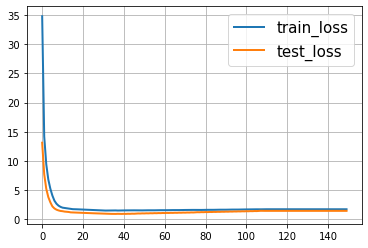

In [21]:
# блок инициализиции и обучения
svm = CustomSVM(etha=0.005, alpha=0.006, epochs=150)
svm.fit(X_train, Y_train, X_test, Y_test)

print(svm.train_errors) # numbers of error in each epoch
print(svm._w) # w0*x_i[0]+w1*x_i[1]+w2=0

plt.plot(svm.train_loss, linewidth=2, label='train_loss')
plt.plot(svm.val_loss, linewidth=2, label='test_loss')
plt.grid()
plt.legend(prop={'size': 15})
plt.show()

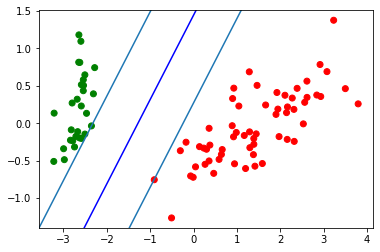

In [22]:
d = {-1:'green', 1:'red'}
plt.scatter(X_train[:,0], X_train[:,1], c=[d[y] for y in Y_train])
newline([0,-svm._w[2]/svm._w[1]],[-svm._w[2]/svm._w[0],0], 'blue') # в w0*x_i[0]+w1*x_i[1]+w2*1=0 поочередно
                                                        # подставляем x_i[0]=0, x_i[1]=0
newline([0,1/svm._w[1]-svm._w[2]/svm._w[1]],[1/svm._w[0]-svm._w[2]/svm._w[0],0]) #w0*x_i[0]+w1*x_i[1]+w2*1=1
newline([0,-1/svm._w[1]-svm._w[2]/svm._w[1]],[-1/svm._w[0]-svm._w[2]/svm._w[0],0]) #w0*x_i[0]+w1*x_i[1]+w2*1=-1
plt.show()

In [23]:
X_train[:,1]

array([ 0.81336382, -0.235112  ,  0.31939725, -0.72308191, -0.34889781,
        0.68516047,  0.22904384,  0.51356031,  0.11662796,  0.2283619 ,
       -0.21727758,  0.81067951,  0.26864374, -0.1797279 , -0.22794557,
        0.37526917,  0.78279195, -0.14601688, -0.60609153, -0.03728186,
       -0.51139459, -1.26597119,  0.13095149,  0.50377114,  0.4606741 ,
       -0.48428742, -0.20431849,  0.2778626 , -0.25485421, -0.57491635,
        0.6450689 , -0.2438315 , -0.20439933,  0.74133045,  0.32850447,
       -0.28266094,  1.17876464,  0.1875323 , -0.50491009, -0.32778731,
        0.3555    , -0.70517213,  1.09314576,  0.21627559, -0.35296967,
       -0.34192606,  0.46717949, -0.31403244, -0.42095429,  0.18365128,
        0.50426282, -0.17700123, -0.16499026,  0.39134594, -0.31829898,
       -0.75609337, -0.00984911,  0.24222841,  0.33499061, -0.54314555,
       -0.11666865, -0.12481785,  0.13346807, -0.14341341, -0.08946138,
       -0.67071154, -0.19696122,  0.43299606, -0.55003646, -0.18

### Убеждаемся, что все объекты из отложенной выборки классифицируются правильно

Количество ошибок для отложенной выборки:  0


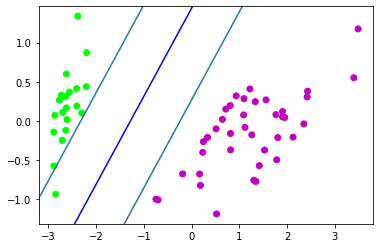

In [24]:
# предсказываем после обучения
y_pred = svm.predict(X_test)
y_pred[y_pred != Y_test] = -100 # find and mark classification error
print('Количество ошибок для отложенной выборки: ', (y_pred == -100).astype(int).sum())
d1 = {-1:'lime', 1:'m', -100: 'black'} # black = classification error
plt.scatter(X_test[:,0], X_test[:,1], c=[d1[y] for y in y_pred])
newline([0,-svm._w[2]/svm._w[1]],[-svm._w[2]/svm._w[0],0], 'blue')
newline([0,1/svm._w[1]-svm._w[2]/svm._w[1]],[1/svm._w[0]-svm._w[2]/svm._w[0],0]) #w0*x_i[0]+w1*x_i[1]+w2*1=1
newline([0,-1/svm._w[1]-svm._w[2]/svm._w[1]],[-1/svm._w[0]-svm._w[2]/svm._w[0],0]) #w0*x_i[0]+w1*x_i[1]+w2*1=-1
plt.show()

### Демонстрируем, что работает для линейно неразделимой выборки:

In [25]:
# блок подготовки данных
iris = load_iris()
X = iris.data
Y = iris.target

pca = PCA(n_components=2)
X = pca.fit_transform(X)
Y = (Y == 2).astype(int)*2-1 # [0,1,2] --> [False,False,True] --> [0,1,1] --> [0,0,2] --> [-1,1,1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=2020)

[50 40 35 30 27 26 25 24 25 25 23 24 23 23 24 22 22 20 22 20 19 18 17 17
 17 17 17 17 19 18 17 19 17 17 17 15 15 15 15 14 15 15 15 14 15 15 15 14
 15 15 15 14 15 15 15 14 15 15 15 12 13 12 13 12 13 12 13 12 13 12 13 12
 13 12 13 12 13 12 13 11 12 11 12 13 11 12 11 12 11 12 11 12 11 12 11 12
 11 12 11 12 11 12 11 12 11 12 11 12 11 12 11 12 11 12 11 12 11 12 11 12
 11 12 11 12 11 12 11 11 12 10 11 12 11 12 10 11 12 10 11 10 10 10 11 10
 10 10 10 11 10 10]
[ 4.40463482 -2.22883706 -5.59349183]


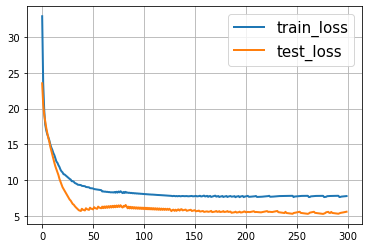

In [26]:
# блок инициализиции и обучения
svm = CustomSVM(etha=0.03, alpha=0.0001, epochs=300)
svm.fit(X_train, Y_train, X_test, Y_test)


print(svm.train_errors[:150]) # numbers of error in each epoch
print(svm._w) # w0*x_i[0]+w1*x_i[1]+w2=0

plt.plot(svm.train_loss, linewidth=2, label='train_loss')
plt.plot(svm.val_loss, linewidth=2, label='test_loss')
plt.grid()
plt.legend(prop={'size': 15})
plt.show()

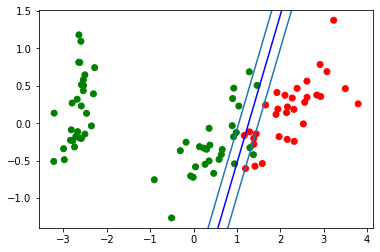

In [27]:
d = {-1:'green', 1:'red'}
plt.scatter(X_train[:,0], X_train[:,1], c=[d[y] for y in Y_train])
newline([0,-svm._w[2]/svm._w[1]],[-svm._w[2]/svm._w[0],0], 'blue') # в w0*x_i[0]+w1*x_i[1]+w2*1=0 поочередно
                                                        # подставляем x_i[0]=0, x_i[1]=0
newline([0,1/svm._w[1]-svm._w[2]/svm._w[1]],[1/svm._w[0]-svm._w[2]/svm._w[0],0]) #w0*x_i[0]+w1*x_i[1]+w2*1=1
newline([0,-1/svm._w[1]-svm._w[2]/svm._w[1]],[-1/svm._w[0]-svm._w[2]/svm._w[0],0]) #w0*x_i[0]+w1*x_i[1]+w2*1=-1
plt.show()

Количество ошибок для отложенной выборки:  2


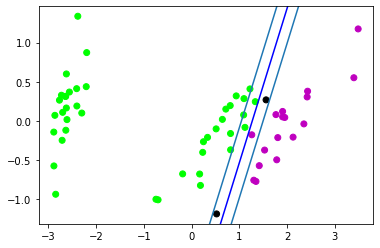

In [28]:
# предсказываем после обучения
y_pred = svm.predict(X_test)
y_pred[y_pred != Y_test] = -100 # find and mark classification error
print('Количество ошибок для отложенной выборки: ', (y_pred == -100).astype(int).sum())
d1 = {-1:'lime', 1:'m', -100: 'black'} # black = classification error
plt.scatter(X_test[:,0], X_test[:,1], c=[d1[y] for y in y_pred])
newline([0,-svm._w[2]/svm._w[1]],[-svm._w[2]/svm._w[0],0], 'blue')
newline([0,1/svm._w[1]-svm._w[2]/svm._w[1]],[1/svm._w[0]-svm._w[2]/svm._w[0],0]) #w0*x_i[0]+w1*x_i[1]+w2*1=1
newline([0,-1/svm._w[1]-svm._w[2]/svm._w[1]],[-1/svm._w[0]-svm._w[2]/svm._w[0],0]) #w0*x_i[0]+w1*x_i[1]+w2*1=-1
plt.show()

### Loss functions

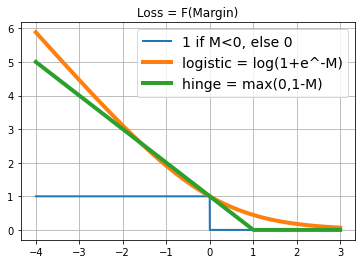

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xx = np.linspace(-4,3,100000)
plt.plot(xx, [(x<0).astype(int) for x in xx], linewidth=2, label='1 if M<0, else 0')
plt.plot(xx, [np.log2(1+2.76**(-x))  for x in xx], linewidth=4, label='logistic = log(1+e^-M)')
plt.plot(xx, [np.max(np.array([0,1-x]))  for x in xx], linewidth=4, label='hinge = max(0,1-M)')
plt.title('Loss = F(Margin)')
plt.grid()
plt.legend(prop={'size': 14});

### Из коробки

In [30]:
from sklearn import svm
from sklearn.metrics import recall_score

C = 1.0  # = self._alpha in our algorithm
model1 = svm.SVC(kernel='linear', C=C)
#model1 = svm.LinearSVC(C=C, max_iter=10000)
#model1 = svm.SVC(kernel='rbf', gamma=0.7, C=C)
#model1 = svm.SVC(kernel='poly', degree=3, gamma='auto', C=C)

model1.fit(X_train, Y_train)
y_predict = model1.predict(X_test)
print(recall_score(Y_test, y_predict, average=None))

[0.97619048 0.94444444]


### другеи ирисы

In [31]:
# https://coderlessons.com/tutorials/python-technologies/uznaite-mashinnoe-obuchenie-s-python/ml-mashina-opornykh-vektorov-svm

In [32]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt

In [33]:
iris = datasets.load_iris()

In [34]:
X = iris.data[:, :2]
y = iris.target


In [35]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

In [36]:
C = 1.0

Text(0.5, 1.0, 'Support Vector Classifier with rbf kernel')

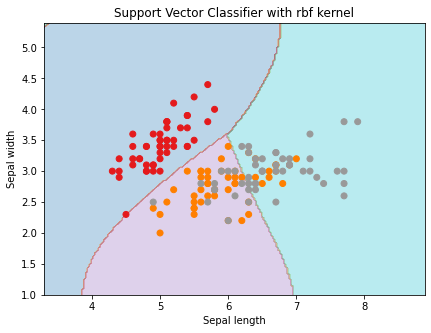

In [37]:
svc_classifier = svm.SVC(kernel = 'rbf', gamma ='auto',C = C).fit(X, y)
Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap = plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with rbf kernel')